In [42]:
import matplotlib.pyplot as plt
import math

# Constant

Energy to send a packet

In [43]:
EnergyTxRxCircuitry = 50     #nJ/bit
packet = 2000       #bit
k = 1               #nJ/bit/m²

battery = 5         #mJ

PacketEnergy = packet*EnergyTxRxCircuitry
print("Energy necessary to send a packet: ", PacketEnergy, "nJ")


Energy necessary to send a packet:  100000 nJ


# Finding system's lifetime

Sensors positioning

In [44]:
sensors = [(1,2), (10,3), (4,8), (16,7), (6,1), (9,12), (14,4), (3, 10), (7,7), (12, 14)]
sink = (20,20)
x_coords = [sensor[0] for sensor in sensors]
y_coords = [sensor[1] for sensor in sensors]

Plot of the sensors

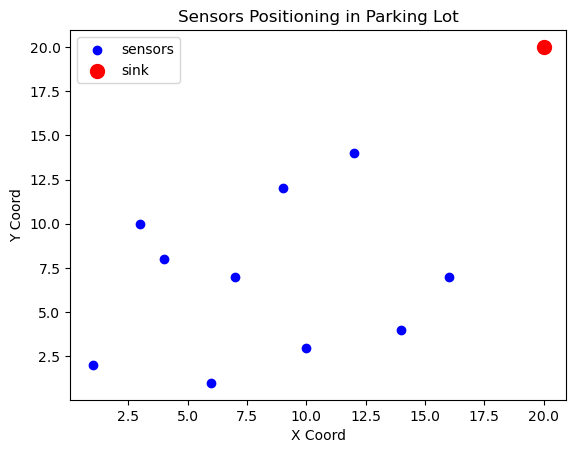

In [45]:
plt.scatter(x_coords, y_coords, color='b', label='sensors')

plt.scatter(20, 20, color='r', marker='o', s=100, label='sink')

plt.xlabel('X Coord')
plt.ylabel('Y Coord')
plt.title('Sensors Positioning in Parking Lot')

plt.legend()

plt.show()

Computing the distances from each node to the sink

In [46]:
distances = [math.sqrt((x - sink[0])**2 + (y - sink[1])**2) for x, y in sensors]
max = -1
for i, dist in enumerate(distances):
    print(f"Distance from the the node {sensors[i]} to the sink is: {dist:.2f} meters")
    if(dist > max):
        max = dist

Distance from the the node (1, 2) to the sink is: 26.17 meters
Distance from the the node (10, 3) to the sink is: 19.72 meters
Distance from the the node (4, 8) to the sink is: 20.00 meters
Distance from the the node (16, 7) to the sink is: 13.60 meters
Distance from the the node (6, 1) to the sink is: 23.60 meters
Distance from the the node (9, 12) to the sink is: 13.60 meters
Distance from the the node (14, 4) to the sink is: 17.09 meters
Distance from the the node (3, 10) to the sink is: 19.72 meters
Distance from the the node (7, 7) to the sink is: 18.38 meters
Distance from the the node (12, 14) to the sink is: 10.00 meters


All the nodes will consume the same amount of energy to power the transmission circuitry, so the node which is furthest from the sink will consume more energy to transmit the payload, so it will finish the battery earlier

In [52]:
MaxTransmissionEnergy = k*max**2 #nJ/bit
print("Max transmission energy: ", MaxTransmissionEnergy," nJ/bit")

Max transmission energy:  685.0  nJ/bit


Total energy consumption of the furthest node

In [48]:
TotEnergy= EnergyTxRxCircuitry + MaxTransmissionEnergy
print(TotEnergy," nJ")

735.0  nJ


Number of **cycles** needed to consume the battery:  

In [56]:
cycles = battery / (TotEnergy/10e2)
print("Power cycles: ", cycles)
print(f"Lifetime: {cycles * 10:.2f} minutes")

Power cycles:  6.802721088435375
Lifetime: 68.03 minutes


# Optimal sink position

To determine the optimal position of the sink while minimizing the total distance to all sensors, the sink should be positioned at the average x and y position of the nodes. This can be demonstrated to be correct using gradient analysis of the cost of each transmission

In [ ]:
meanX = sum(x_coords) / len(x_coords)
meanY = sum(y_coords) / len(y_coords)

optimal_sink = (meanX, meanY)
optimal_sink_x = optimal_sink[0]
optimal_sink_y = optimal_sink[1]

print("Optimal coordinates for the sink: ", optimal_sink)

(8.2, 6.8)


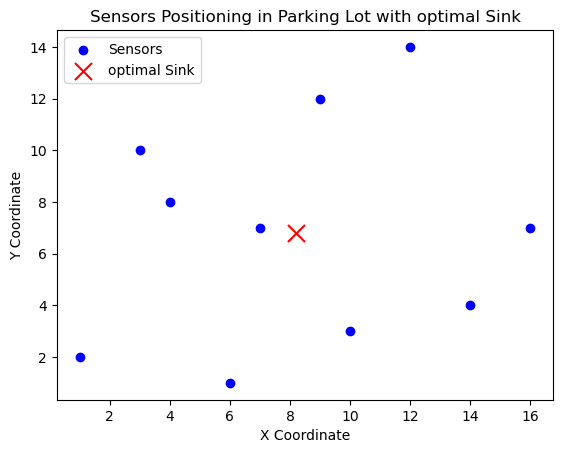

In [51]:
plt.scatter(x_coords, y_coords, color='b', label='Sensors')

plt.scatter(optimal_sink[0], optimal_sink[1], color='r', marker='x', s=150, label='optimal Sink')

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Sensors Positioning in Parking Lot with optimal Sink')

plt.legend()
plt.show()